# Stock Analysis

### For this project, we will use Long Short Term Memory (LSTM), an artificial recurrent Neural Network to predict closing stock market prices of Blackberry using stock price data from last 60 days

#### Import libraries

In [6]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

#### Get the stock Prices

In [53]:
df = web.DataReader('BB', data_source='yahoo', start='2012-01-01', end = '2021-02-19')

#### Show the data

In [54]:
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,15.86,14.78,14.84,15.51,37162900,15.51
2012-01-04,15.52,14.88,15.47,15.08,17220500,15.08
2012-01-05,15.29,14.94,14.99,15.05,14915200,15.05
2012-01-06,15.49,15.08,15.08,15.34,13645100,15.34
2012-01-09,15.60,15.21,15.39,15.51,12986300,15.51
...,...,...,...,...,...,...
2021-02-12,13.29,12.12,12.29,13.04,18066700,13.04
2021-02-16,13.17,12.05,13.12,12.21,25407500,12.21
2021-02-17,11.82,11.01,11.80,11.32,26222900,11.32


#### Get the number of rows and columns in the data set

In [55]:
df.shape

(2298, 6)

#### Visualize the closing price

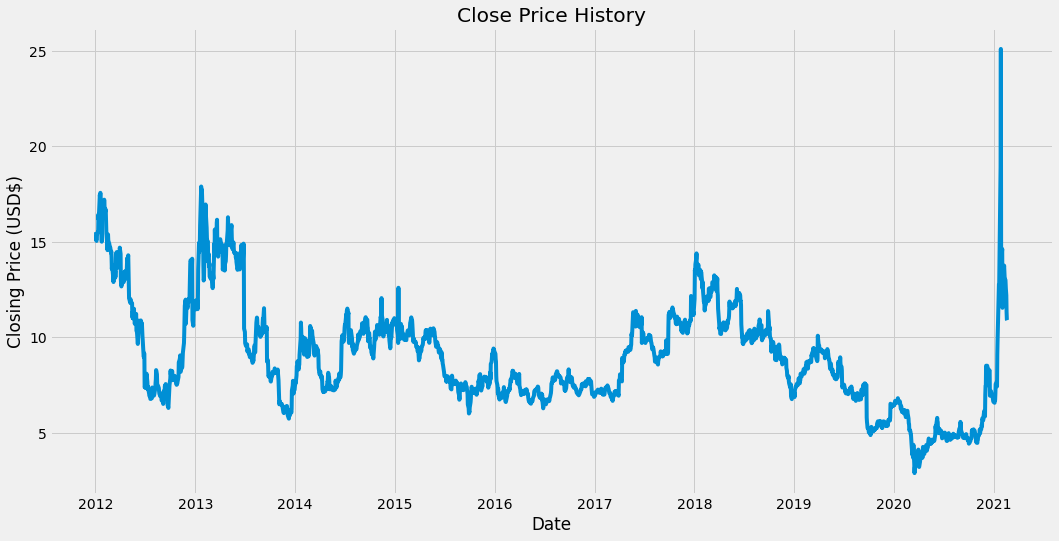

In [56]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD$)')
plt.show()

#### Create new data frame with only the Closing Price and convert it to a numpy array

In [57]:
data = df.filter(['Close'])
dataset = data.values

#### Get the number of rows to train the model on

In [58]:
train_data_len = math.ceil(len(dataset)*0.8)
train_data_len

1839

#### Scale the data by normalizing it

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.56801802],
       [0.54864863],
       [0.54729729],
       ...,
       [0.37927926],
       [0.36216213],
       [0.36036033]])

#### Create scaled training data set

In [65]:
train_data = scaled_data[0:train_data_len, :]
# Split the data into x_train and y_train
x_train = []
y_train = []
# give x and y training arrays some data
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print (x_train)
        print (y_train)
        print
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# reshape the data to 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.56801802, 0.54864863, 0.54729729, 0.56036036, 0.56801802,
       0.56801802, 0.5725225 , 0.60990992, 0.59774774, 0.65630626,
       0.64774777, 0.66081078, 0.63513512, 0.57027028, 0.54549549,
       0.60360356, 0.6018018 , 0.62612608, 0.63603604, 0.61846842,
       0.62162164, 0.64459454, 0.62972968, 0.6162162 , 0.62207202,
       0.61216214, 0.58558556, 0.56486483, 0.54054051, 0.52567565,
       0.53603603, 0.56261262, 0.54819817, 0.53963963, 0.52972971,
       0.53018017, 0.53243243, 0.51891891, 0.52252251, 0.50765765,
       0.48108107, 0.49054053, 0.46936935, 0.46081081, 0.45045042,
       0.46396395, 0.48108107, 0.45990988, 0.47702701, 0.46171168,
       0.47522521, 0.51711711, 0.52117117, 0.50495493, 0.50180179,
       0.49009007, 0.48468467, 0.50180179, 0.49504505, 0.48513513])]
[0.48783780663501713]
[array([0.56801802, 0.54864863, 0.54729729, 0.56036036, 0.56801802,
       0.56801802, 0.5725225 , 0.60990992, 0.59774774, 0.65630626,
       0.64774777, 0.66081078, 0.635

(1779, 60, 1)

## Building the LSTM Model

In [71]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#### Compile the model

In [73]:
model.compile(optimizer="adam", loss = "mean_squared_error")

#### Train the model with training data

In [74]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1779/1779 [==============================] - 23s 13ms/step - loss: 0.0013


#### Create testing data set

In [78]:
# Create a new array containing scaled values
test_data = scaled_data[train_data_len-60: , :]
# Create data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

#### Convert data to numpy

In [80]:
x_test = np.array(x_test)

#### Reshape the data

In [83]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#### Get models predictive price values

In [85]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#### Get the root mean squared error (RMSE)

In [88]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.9128014205278436

## Plot the Data

<ipython-input-94-b44c264611e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

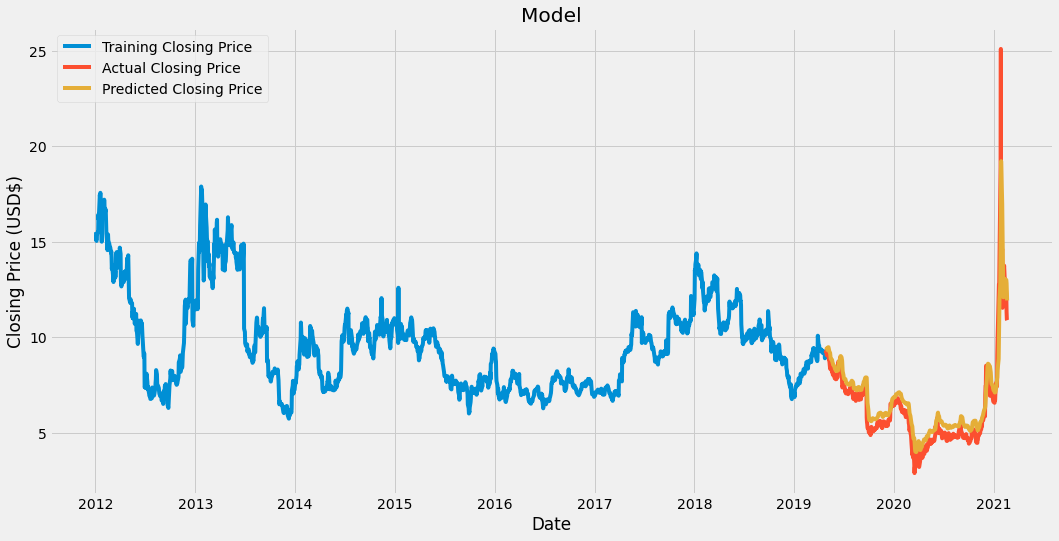

In [94]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

#plot the graph
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD$)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Training Closing Price", 'Actual Closing Price', 'Predicted Closing Price'])
plt.show

#### Show the actual closing price and predicted closing price

In [95]:
valid

,Close,Predictions
Date,,
2019-04-26,9.19,9.352386
2019-04-29,9.29,9.360096
2019-04-30,9.18,9.409348
2019-05-01,9.07,9.434502
2019-05-02,9.22,9.419100
...,...,...
2021-02-12,13.04,12.991569
2021-02-16,12.21,13.011625
2021-02-17,11.32,12.835029


As we can see, the model does a pretty decent job in predicting the closing price.

## Predict Closing Price For Future Dates

In [98]:
bb_quote = web.DataReader("BB", data_source = 'yahoo', start = '2012-01-01', end ='2021-12-31')


#### create a dataframe

In [110]:
new_df = bb_quote.filter(['Close'])
# Get the last 60 days closing price values and convert dataframe to array
last_60_days = new_df[-60:].values
# Scale the dataframe to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
x2_test = []
# append the last 60 days
x2_test.append(last_60_days_scaled)
# convert to numpy array
x2_test = np.array(x2_test)
# reshape the data
x2_test = np.reshape(x2_test, (x2_test.shape[0], x2_test.shape[1], 1))

#### Get the predicted scaled price

In [113]:
predicted_price = model.predict(x2_test)
## undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[11.55367]]


#### The predicted closing price for Blackberry on December 31, 2021 is $11.55